In [1]:
import numpy as np
import os
from PIL import Image
import matplotlib.pyplot as plt
import pandas as pd
import glob
import time
from sklearn.model_selection import train_test_split
from prettytable import PrettyTable

In [2]:
## get the current directory with a path to the yaledatabase folder
direc = os.getcwd() + '/yaledatabase'

## Activity 1
We first display the first 25 images to make sure they are loaded correctly.

In [3]:
## Compiles all the faces in the file into one dataframe called faces

x = list(f for f in sorted(os.listdir(direc)))[1:]
faces = pd.DataFrame(columns=['Subject','Type','Face'])
for i in range(len(x)):
    filename = direc + '/' + x[i]
    p = x[i].split('.')
    faces.loc[i] = [p[0],p[1],Image.open(filename)]
    
numfaces = len(faces)

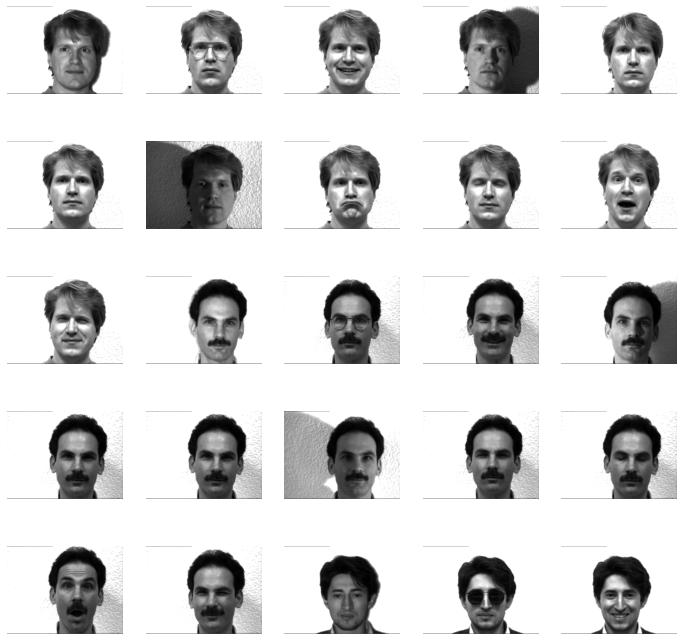

In [4]:
# Define a figure of size (12, 12)
fig=plt.figure(figsize=(12, 12))

# Define row and cols in the figure
rows, cols = 5, 5

#Display first 25 images from the dataframe
for j in range(0, cols*rows):
    fig.add_subplot(rows, cols, j+1)
    plt.imshow(faces.loc[j]['Face'], cmap = 'gray')
    plt.axis("off")
    
# plt.savefig('25faces.png')
plt.show()

## Activity 2
We define functions to get vector representations of the images, and to get an image from the vector representation.

In [5]:
def img2vec(data):
    '''Converts a given image to a 1d vector'''
    img = np.array(data)
    img = img.reshape(-1)
    return np.array(img)

In [6]:
# Create a dataset of the vector representations of each image as columns
# Check the shape of vectors
dataset = np.column_stack([img2vec(faces.loc[i]['Face']) for i in range(numfaces)])
print(dataset.shape)

(77760, 165)


In [7]:
def vec2img(data):
    '''Convert a given 1d vector to image'''
    img = data.reshape(243,320)
    return np.array(img)

In [8]:
def plot_faces(data,num):
    '''Plots grid of given size (num x num) of faces given as column vectors'''
    # Define a figure of size (12, 12)
    fig=plt.figure(figsize=(12, 12))

    # Define row and cols in the figure
    rows, cols = num, num

    #Display first 25 images
    for j in range(0, cols*rows):
        fig.add_subplot(rows, cols, j+1)
        im = vec2img(data[:,j])
        plt.imshow(im, cmap = 'gray')
        plt.axis("off")

    plt.show()

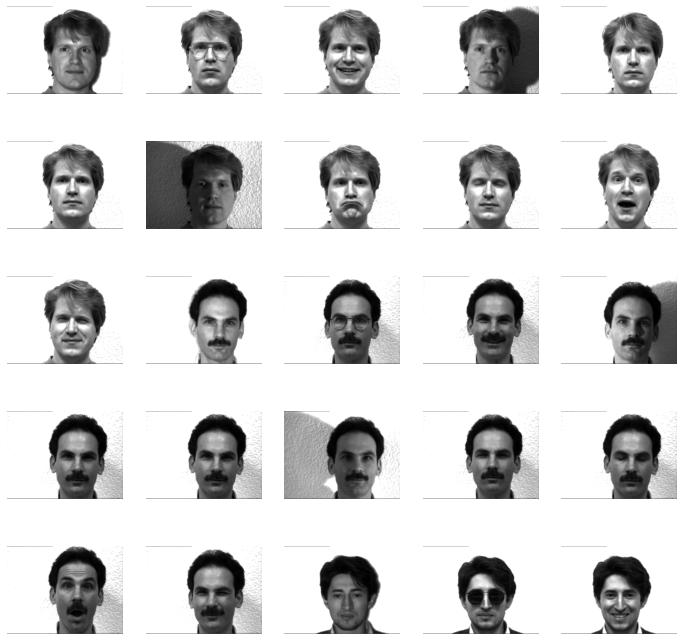

In [9]:
# Display the images again using the created dataset and vec2img()
plot_faces(dataset,5)

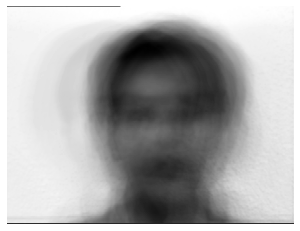

In [10]:
## Compute the average face to normalize the dataset
avg = np.mean(dataset,axis=1)

img3 = vec2img(avg)
plt.imshow(img3, cmap = 'gray')
plt.axis("off")
# plt.savefig('meanface.png')
plt.show()

(77760, 165)


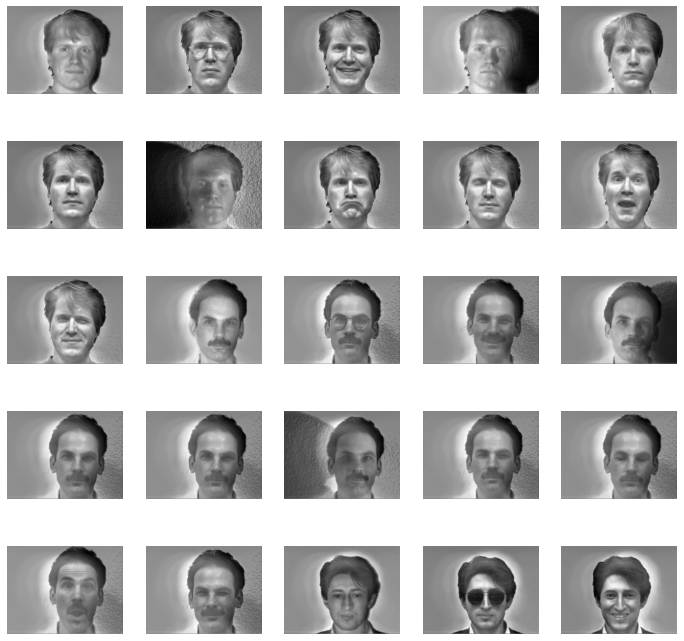

In [11]:
## Normalize the dataset by subtracting the average face,
## We need to reshape the avg face vector to a column vector
## Check the new dataset has the correct shape and plot the first 25 faces again
ndataset = dataset - avg.reshape(77760,1)
print(ndataset.shape)
plot_faces(ndataset,5)

## Activity 3

In [12]:
def split_dataset(x,data):
    '''
    Split faces into Known and Unknown faces
    x = split size for each subject, how many faces of each subject are in train
    Returns the train and test matrices, and lists of the indices of each face in each set
    '''
    train_list,test_list=[],[]
    n = 11  # total number of images in each subject
    for i in range(int(numfaces/n)):
        train_list+=[idx for idx in range(i*n,i*n+x)]
        test_list+=[idx for idx in range(i*n+x,i*n+n)]

    print("Indices of Train list: ",train_list)
    print()
    print("Indices of Test list: ",test_list)
    
    train_data=data[:,train_list]
    test_data=data[:,test_list]
    
    return train_data,test_data,train_list,test_list

In [13]:
def split_dataset_random(data,size):
    '''
    This function randomly splits the data using sklearn according to size
    Size determines how many of the 11 faces are in the train set
    Returns F (train), Q (test), and indices of each face in original dataset for reference
    '''
    Find = []
    Qind = []
    n = 11
    for i in range(numfaces//n):
        ind = [idx for idx in range(i*n,i*n+n)]
        y = ind
        X = data[:,y].T
        ## for reproducable: include random_state=int
        X_train, X_test, y_train, y_test = train_test_split(X,y, train_size=size/n)
        Find += y_train
        Qind += y_test

    F = dataset[:,Find]
    Q = dataset[:,Qind]
    
    return F,Q,Find,Qind

First, we split the data manually, first 6 of each face is known (F) and last 5 of each face is unknown (Q):

In [14]:
F,Q,Find,Qind = split_dataset(6,dataset)

Indices of Train list:  [0, 1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 22, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 44, 45, 46, 47, 48, 49, 55, 56, 57, 58, 59, 60, 66, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 82, 88, 89, 90, 91, 92, 93, 99, 100, 101, 102, 103, 104, 110, 111, 112, 113, 114, 115, 121, 122, 123, 124, 125, 126, 132, 133, 134, 135, 136, 137, 143, 144, 145, 146, 147, 148, 154, 155, 156, 157, 158, 159]

Indices of Test list:  [6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 28, 29, 30, 31, 32, 39, 40, 41, 42, 43, 50, 51, 52, 53, 54, 61, 62, 63, 64, 65, 72, 73, 74, 75, 76, 83, 84, 85, 86, 87, 94, 95, 96, 97, 98, 105, 106, 107, 108, 109, 116, 117, 118, 119, 120, 127, 128, 129, 130, 131, 138, 139, 140, 141, 142, 149, 150, 151, 152, 153, 160, 161, 162, 163, 164]


In [15]:
F.shape

(77760, 90)

In [16]:
Q.shape

(77760, 75)

# Activity 4

In [17]:
def query(face,database):
    '''
    This function takes a queried face and checks it against every face in the train set,
    returns the index in the test set of the face closest to queried face
    '''
    sub = 0
    d = 100000
    for i in range(database.shape[1]):
        test = database[:,i]
        dist = np.linalg.norm(np.maximum(face,test)-np.minimum(face,test))
        if dist<d:
            sub = i
            d = dist
    
    return sub

We test two different examples using the query function:

In [18]:
q1=1
sub1 = query(Q[:,q1],F)
print('Chosen subject:',faces.loc[Find[sub1]]['Subject'])
print('Correct subject:',faces.loc[Qind[q1]]['Subject'])
print('Face type:',faces.loc[Qind[q1]]['Type'])

Chosen subject: subject01
Correct subject: subject01
Face type: sad


In [19]:
q2=30
sub2 = query(Q[:,q2],F)
print('Chosen subject:',faces.loc[Find[sub2]]['Subject'])
print('Correct subject:',faces.loc[Qind[q2]]['Subject'])
print('Face type:',faces.loc[Qind[q2]]['Type'])

Chosen subject: subject15
Correct subject: subject07
Face type: rightlight


Some faces are recognized correctly, some are not. The face with extreme lighting was not recognized correctly, while the face with only a slight difference was recognized correctly.

In [20]:
def checkface(q,sub,Qind,Find):
    '''
    Checks whether the subject label ('subject01','subject13',etc) for the chosen closest face,
    is the correct subject label for the queried face.
    
    q = the index of the test set of the face queried
    sub = the index of the train set chosen from query as the closest face
    
    Returns True or False
    '''
    return faces.loc[Qind[q]]['Subject'] == faces.loc[Find[sub]]['Subject']

In [21]:
# Test this function on the previous two examples:
print(checkface(q1,sub1,Qind,Find))
print(checkface(q2,sub2,Qind,Find))

True
False


# Activity 5

In [22]:
def testQ(Q,F,Qind,Find):
    '''
    Test each face in query set using query(),
    check if the subject was chosen correctly using checkface()
    Report accuracy as a percentage of faces chosen correctly
    '''
    tot = Q.shape[1]
    corr = 0
    for i in range(tot):
        sub = query(Q[:,i],F)
        if checkface(i,sub,Qind,Find): corr+=1

    return 100 - (abs(tot-corr)/tot * 100)

We now look at the accuray and efficiency of this method by testing the entire query set against the train set (F)

In [23]:
start = time.time()
print('Accuracy =',testQ(Q,F,Qind,Find),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 89.33333333333333 %
Time elapsed = 1.1739869117736816 s


### Divide the dataset differently and retest:
Now we use a smaller and larger database to see the effect on the accuracy:

In [24]:
# smaller train set
F1,Q1,Find1,Qind1 = split_dataset(4,dataset)

Indices of Train list:  [0, 1, 2, 3, 11, 12, 13, 14, 22, 23, 24, 25, 33, 34, 35, 36, 44, 45, 46, 47, 55, 56, 57, 58, 66, 67, 68, 69, 77, 78, 79, 80, 88, 89, 90, 91, 99, 100, 101, 102, 110, 111, 112, 113, 121, 122, 123, 124, 132, 133, 134, 135, 143, 144, 145, 146, 154, 155, 156, 157]

Indices of Test list:  [4, 5, 6, 7, 8, 9, 10, 15, 16, 17, 18, 19, 20, 21, 26, 27, 28, 29, 30, 31, 32, 37, 38, 39, 40, 41, 42, 43, 48, 49, 50, 51, 52, 53, 54, 59, 60, 61, 62, 63, 64, 65, 70, 71, 72, 73, 74, 75, 76, 81, 82, 83, 84, 85, 86, 87, 92, 93, 94, 95, 96, 97, 98, 103, 104, 105, 106, 107, 108, 109, 114, 115, 116, 117, 118, 119, 120, 125, 126, 127, 128, 129, 130, 131, 136, 137, 138, 139, 140, 141, 142, 147, 148, 149, 150, 151, 152, 153, 158, 159, 160, 161, 162, 163, 164]


In [25]:
start = time.time()
print('Accuracy =',testQ(Q1,F1,Qind1,Find1),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 88.57142857142857 %
Time elapsed = 1.1651382446289062 s


In [26]:
# larger train set
F2,Q2,Find2,Qind2 = split_dataset(8,dataset)

Indices of Train list:  [0, 1, 2, 3, 4, 5, 6, 7, 11, 12, 13, 14, 15, 16, 17, 18, 22, 23, 24, 25, 26, 27, 28, 29, 33, 34, 35, 36, 37, 38, 39, 40, 44, 45, 46, 47, 48, 49, 50, 51, 55, 56, 57, 58, 59, 60, 61, 62, 66, 67, 68, 69, 70, 71, 72, 73, 77, 78, 79, 80, 81, 82, 83, 84, 88, 89, 90, 91, 92, 93, 94, 95, 99, 100, 101, 102, 103, 104, 105, 106, 110, 111, 112, 113, 114, 115, 116, 117, 121, 122, 123, 124, 125, 126, 127, 128, 132, 133, 134, 135, 136, 137, 138, 139, 143, 144, 145, 146, 147, 148, 149, 150, 154, 155, 156, 157, 158, 159, 160, 161]

Indices of Test list:  [8, 9, 10, 19, 20, 21, 30, 31, 32, 41, 42, 43, 52, 53, 54, 63, 64, 65, 74, 75, 76, 85, 86, 87, 96, 97, 98, 107, 108, 109, 118, 119, 120, 129, 130, 131, 140, 141, 142, 151, 152, 153, 162, 163, 164]


In [27]:
start = time.time()
print('Accuracy =',testQ(Q2,F2,Qind2,Find2),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 97.77777777777777 %
Time elapsed = 0.9489085674285889 s


Larger train set gives a higher accuracy, while smaller train set gives a lower accuracy. This makes sense because when we test less faces against a larger database, we are more likely to find a correct match than the opposite.

### Randomly chosen train/test sets
Up until now we were using train/test datasets that were chosen deliberately. Now we choose them randomly using sklearn.model_selection to split each subject into train and test sets:

In [28]:
# Check that the random dataset split gives the correct size train/test sets
F,Q,Find,Qind = split_dataset_random(dataset,6)

In [29]:
F.shape

(77760, 90)

In [30]:
Q.shape

(77760, 75)

In [31]:
## Randomly split the dataset 30 times
## calculate the accuracy and efficiency of each to get an average for random split
accs = []
ts = []
for i in range(30):
    F,Q,Find,Qind = split_dataset_random(dataset,6)
    start = time.time()
    acc = testQ(Q,F,Qind,Find)
    end = time.time()
    accs += [acc]
    ts += [end-start]

In [32]:
print(np.mean(accs))
print(np.mean(ts))

79.73333333333333
1.5674519220987955


Running this multiple times, for the same size sets, gives a range of accuracy and efficiency. For train/test sizes of 6/4 split randomly, we get an average accuracy and efficiency that is a little worse than when splitting manually. We can see that splitting the dataset randomly, which is more accurate to real life, gives slightly worse accuracy and efficiency than when splitting manually.

# Activity 6
We now use SVD on the dataset and compare these results to our previous ones to test the viability of using SVD for face recognition

In [33]:
## Split the dataset same as before,
## we don't need to use the normalized dataset because SVD does that automatically
F3,Q3,Find3,Qind3 = split_dataset(6,dataset)

Indices of Train list:  [0, 1, 2, 3, 4, 5, 11, 12, 13, 14, 15, 16, 22, 23, 24, 25, 26, 27, 33, 34, 35, 36, 37, 38, 44, 45, 46, 47, 48, 49, 55, 56, 57, 58, 59, 60, 66, 67, 68, 69, 70, 71, 77, 78, 79, 80, 81, 82, 88, 89, 90, 91, 92, 93, 99, 100, 101, 102, 103, 104, 110, 111, 112, 113, 114, 115, 121, 122, 123, 124, 125, 126, 132, 133, 134, 135, 136, 137, 143, 144, 145, 146, 147, 148, 154, 155, 156, 157, 158, 159]

Indices of Test list:  [6, 7, 8, 9, 10, 17, 18, 19, 20, 21, 28, 29, 30, 31, 32, 39, 40, 41, 42, 43, 50, 51, 52, 53, 54, 61, 62, 63, 64, 65, 72, 73, 74, 75, 76, 83, 84, 85, 86, 87, 94, 95, 96, 97, 98, 105, 106, 107, 108, 109, 116, 117, 118, 119, 120, 127, 128, 129, 130, 131, 138, 139, 140, 141, 142, 149, 150, 151, 152, 153, 160, 161, 162, 163, 164]


In [34]:
u,s,vh = np.linalg.svd(F3,full_matrices=False)

## Activity 7
Selecting the dimension p of the face space:

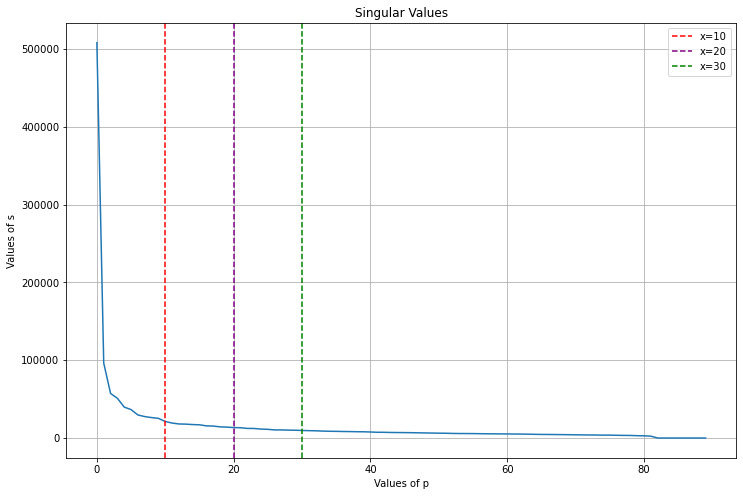

In [35]:
## Look at the singular values to find the value of p that will work for us
## Also plot lines at different values of p to see how many singular values are included
plt.figure(figsize=(12,8))
plt.plot(np.arange(u.shape[1]),s)
plt.grid()
plt.title('Singular Values')
plt.xlabel('Values of p')
plt.ylabel('Values of s')
plt.axvline(x=10,linestyle='dashed',color='red',label='x=10')
plt.axvline(x=20,linestyle='dashed',color='purple',label='x=20')
plt.axvline(x=30,linestyle='dashed',color='green',label='x=30')
plt.legend()
plt.savefig('singvals.png')
plt.show()

We will start with p=10 as this is the "elbow" of the graph and contains most singular values. To reduce the dimension, the first step is to select the first 10 columns of the U matrix. We check that this new matrix is the right shape (77760 x 10):

In [36]:
U1 = u[:,:10]

In [37]:
U1.shape

(77760, 10)

## Activity 8
Now we can project the data into the reduced face space and again preform face recognition as in Activity 5:

In [38]:
## Project the data into the new reduced face space
## Check that the shape of the new matrices are correct:
## 90 faces in F represented by 10 values each
## and 75 faces in Q represented by 10 values each
projF1 = U1.T @ F3
projQ1 = U1.T @ Q3

In [39]:
projF1.shape

(10, 90)

In [40]:
projQ1.shape

(10, 75)

In [41]:
## Calculate the accuracy and efficiency of face recognition in the reduced face space as before:
start = time.time()
print('Accuracy =',testQ(projQ1,projF1,Qind3,Find3),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 81.33333333333333 %
Time elapsed = 0.15500211715698242 s


### Try with different values of p
We want to look at the effect on accuracy and efficiency when we include more singular values by increasing p:

In [42]:
U2 = u[:,:20]
projF2 = U2.T @ F3
projQ2 = U2.T @ Q3

start = time.time()
print('Accuracy =',testQ(projQ2,projF2,Qind3,Find3),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 84.0 %
Time elapsed = 0.1288771629333496 s


In [43]:
U3 = u[:,:30]
projF3 = U3.T @ F3
projQ3 = U3.T @ Q3

start = time.time()
print('Accuracy =',testQ(projQ3,projF3,Qind3,Find3),'%')
end = time.time()
print('Time elapsed =',end-start,'s')

Accuracy = 86.66666666666667 %
Time elapsed = 0.11201214790344238 s


We gain 5% accuracy by using p=30, without gaining time and losing efficiency.  
We can see in general how an increase in p-values leads to a higher efficiency, because we are adding more values to the reduced space until we eventually end up with the entire set and we recover the accuracy from Activity 5:

In [44]:
# Calculating accuracy and efficieny of face recognition for various values of 'p'

Accuracy= []
ts = []
p_values = [1,10,20,30,40,50,60,70,80,90]
for i in p_values:
    U = u[:,:i]
    projF = U.T @ F3
    projQ = U.T @ Q3
    start = time.time()
    Accuracy.append(round(testQ(projQ,projF,Qind3,Find3),3))
    end = time.time()
    ts.append(end-start)
    
print('Accuracy values: ', Accuracy)
print('Time elapsed for each p value: ',ts)

Accuracy values:  [22.667, 81.333, 84.0, 86.667, 86.667, 86.667, 88.0, 89.333, 89.333, 89.333]
Time elapsed for each p value:  [0.09379196166992188, 0.10564088821411133, 0.10199499130249023, 0.11227703094482422, 0.11727190017700195, 0.12105226516723633, 0.12380480766296387, 0.11806607246398926, 0.106719970703125, 0.13486218452453613]


Observations: 
- The results above show that accuracy increases with increase in 'p' value.
- Accuracy value, which is at 22.67% when p=1, has increased rapidly to 81.33% with p=10. It then increased to 86.67% with p=30 and then slowly increased to 89.33% with p=70 and remained constant until p=90

We will continue with $p=30$ to maintain both good accuracy and good efficiency.

We now want to look at the base faces, but first we have to normalize the data to a range of values from 0 to 255 so each vector can be represented as an image.

In [45]:
def normU(data):
    '''
    Normalize the reduced face space to range of [0,255]
    '''
    norm = np.empty_like(data)
    for i in range(data.shape[1]):
        temp = data[:,i] + abs(min(data[:,i]))
        norm[:,i] = temp * (255/max(temp))

    return norm

In [46]:
norm3 = normU(U3)
norm3.shape

(77760, 30)

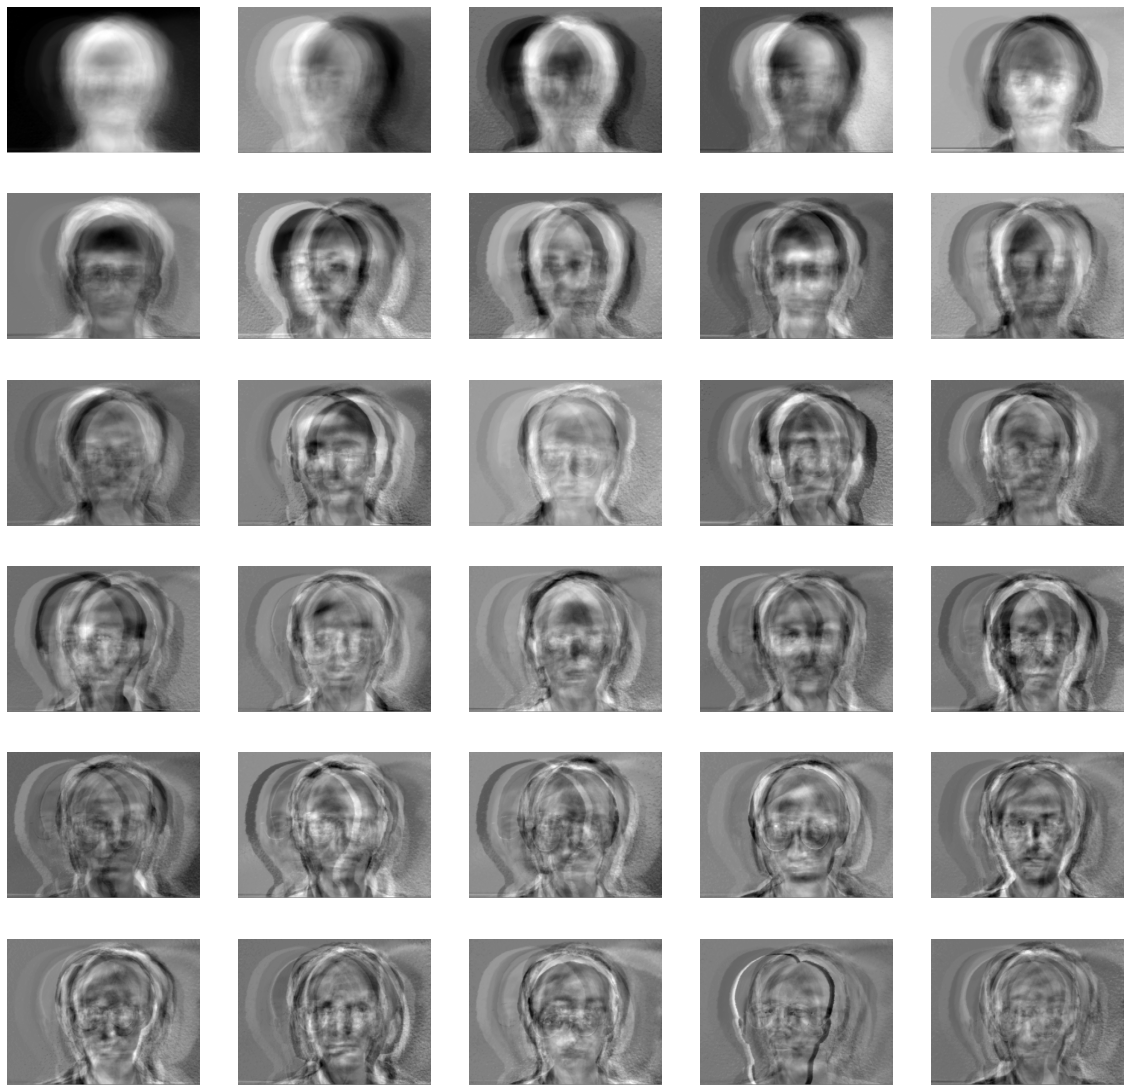

In [47]:
## Plotting the reduced face space
fig=plt.figure(figsize=(20, 20))
for j in range(norm3.shape[1]):
    fig.add_subplot(6,5,j+1)
    im = vec2img(norm3[:,j])
    plt.imshow(im, cmap = 'gray')
    plt.axis("off")

plt.show()

We now repeat this process using randomized train/test sets, as in Activity 5, by looking at the average accuracy and efficiency:

In [48]:
## Randomly split the dataset 30 times
## calculate the accuracy and efficiency of each to get an average for random split
accs = []
ts = []
for i in range(30):
    F,Q,Find,Qind = split_dataset_random(dataset,6)
    u,s,vh = np.linalg.svd(F,full_matrices=False)
    U = u[:,:30]
    projF = U.T@F
    projQ = U.T@Q
    start = time.time()
    acc = testQ(projQ,projF,Qind,Find)
    end = time.time()
    accs += [acc]
    ts += [end-start]

In [49]:
print(np.mean(accs))
print(np.mean(ts))

77.2
0.12983219623565673


We have slightly lower accuracy when the train/test set is randomized, with similar efficiency.

## Summary of results found in each step:
We look at the comparison between different split sizes, manual vs random split, and full vs reduced face space

In [50]:
final = PrettyTable()
final.field_names = ["Face Space", "Split Type", "Known Set Size", "Accuracy (%)", 
                     "Efficiency (s)"]
final.add_rows([["Full", "Manual", 4, 88.571, "1.690"],
                ["Full", "Manual", 6, 89.333, 1.679],
                ["Full", "Manual", 8, 97.778, 1.441],
                ["Full", "Random", 6, 79.289, 1.646],
                ["Reduced", "Manual", 6, 86.667, 0.064],
                ["Reduced", "Random", 6, 77.733, 0.088]])

print(final)

+------------+------------+----------------+--------------+----------------+
| Face Space | Split Type | Known Set Size | Accuracy (%) | Efficiency (s) |
+------------+------------+----------------+--------------+----------------+
|    Full    |   Manual   |       4        |    88.571    |     1.690      |
|    Full    |   Manual   |       6        |    89.333    |     1.679      |
|    Full    |   Manual   |       8        |    97.778    |     1.441      |
|    Full    |   Random   |       6        |    79.289    |     1.646      |
|  Reduced   |   Manual   |       6        |    86.667    |     0.064      |
|  Reduced   |   Random   |       6        |    77.733    |     0.088      |
+------------+------------+----------------+--------------+----------------+


Overall, we see that using SVD gives us a slightly lower accuracy as compared to using the full face space (manual or random), but the efficiency is significantly improved. For the purposes of real-time face recognition, the cost of the slightly lower accuracy is worth the time saved with the higher efficiency. Therefore, using SVD is preferred over the original full face space.